In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
titanic_df = pd.read_csv("C:/Users/windows/Desktop/EDA - Titanic data analysis/titanic.csv")

In [3]:
# 데이터 정보 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 결측치 확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# 결측치 처리

# Cabin 열 제거
titanic_df.drop('Cabin', axis=1, inplace=True)

# Embarked 열의 결측치를 가장 빈도가 높은 값으로 대체
most_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(most_embarked, inplace=True)

# Age 열의 결측치를 중앙값으로 대체
median_age = titanic_df['Age'].median()
titanic_df['Age'].fillna(median_age, inplace=True)

C:\Users\windows\AppData\Local\Temp\ipykernel_23048\3454438348.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(most_embarked, inplace=True)
C:\Users\windows\AppData\Local\Temp\ipykernel_23048\3454438348.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [8]:
# Sex와 Embarked를 One-hot 인코딩
df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

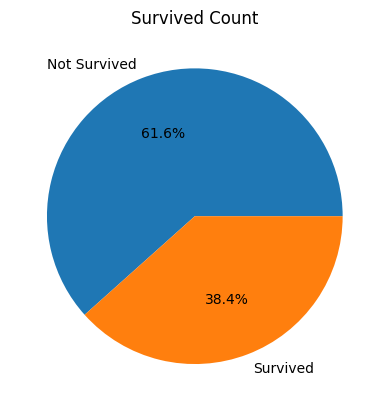

In [9]:
# 생존자와 사망자 비율 pi chart
survived_count = titanic_df['Survived'].value_counts()
plt.pie(survived_count, labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.title('Survived Count')
plt.show()

가설 검증 및 시가화

1-A 항구에 따라 사망자수의 차이가 있다.

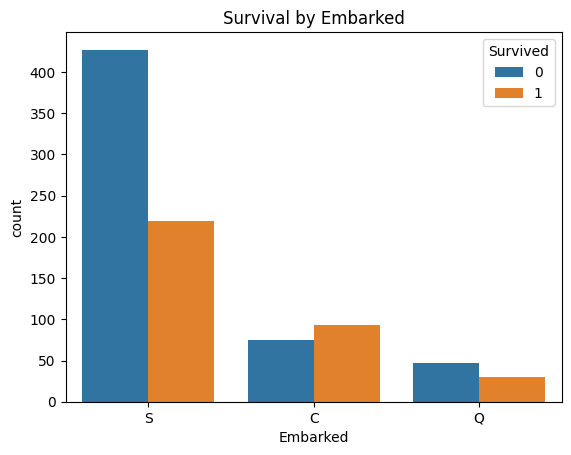

In [10]:
# 항구에 따른 사망자수의 차이
# 생존자: 1, 사망자: 0
sns.countplot(x='Embarked', hue='Survived', data=titanic_df)
plt.title('Survival by Embarked')
plt.show()

C:\Users\windows\AppData\Local\Temp\ipykernel_23048\3585782573.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deaths_by_embarked.index, y=deaths_by_embarked.values, palette='Set2')


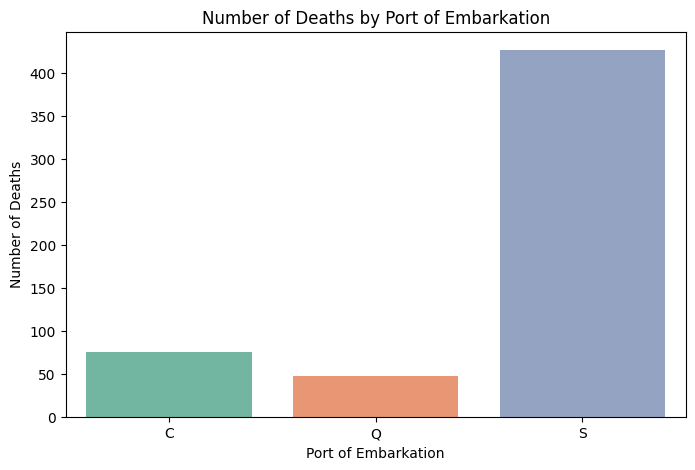

In [13]:
# 사망자만 선택
deaths_by_embarked = titanic_df[titanic_df['Survived'] == 0].groupby('Embarked').size()
total_by_embarked = titanic_df.groupby('Embarked').size()

# 사망자 수를 막대 차트로 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=deaths_by_embarked.index, y=deaths_by_embarked.values, palette='Set2')
plt.ylabel('Number of Deaths')
plt.xlabel('Port of Embarkation')
plt.title('Number of Deaths by Port of Embarkation')
plt.show()

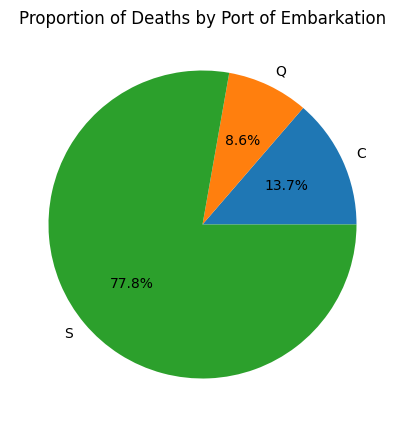

In [14]:
# 사망자 수의 비율을 파이 차트로 시각화
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(deaths_by_embarked, labels=deaths_by_embarked.index, autopct='%1.1f%%')
ax.set_title('Proportion of Deaths by Port of Embarkation')
plt.show()

1-B 남성일 경우 사망자가 많다.

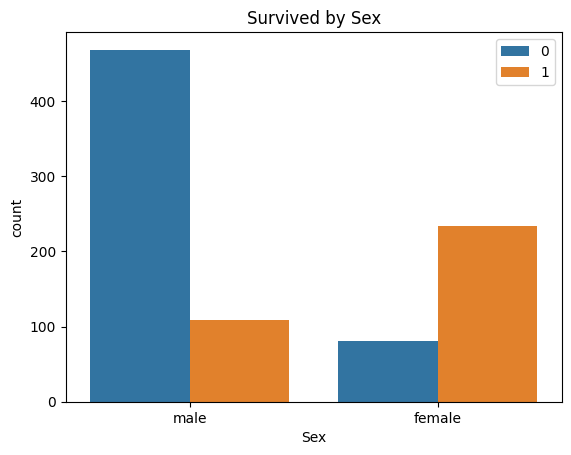

In [15]:
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survived by Sex')
plt.legend(title='')
plt.show()

C:\Users\windows\AppData\Local\Temp\ipykernel_23048\1419618893.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deaths_by_sex.index, y=deaths_by_sex.values, palette='Set2')


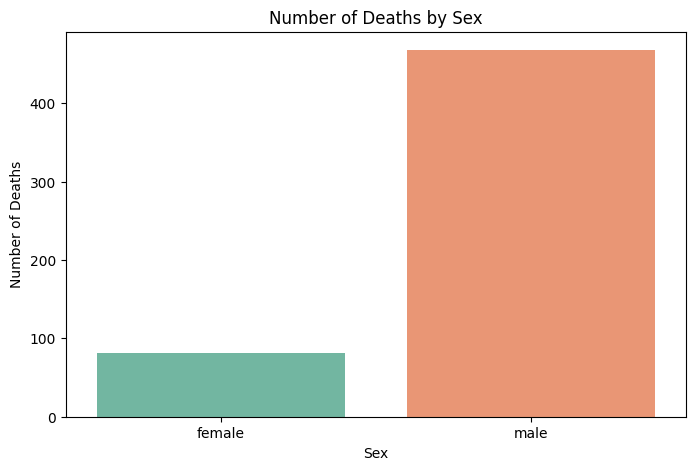

In [16]:
# 성별에 따른 사망자 수
deaths_by_sex = titanic_df[titanic_df['Survived'] == 0].groupby('Sex').size()

# 막대 차트로 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=deaths_by_sex.index, y=deaths_by_sex.values, palette='Set2')
plt.ylabel('Number of Deaths')
plt.xlabel('Sex')
plt.title('Number of Deaths by Sex')
plt.show()

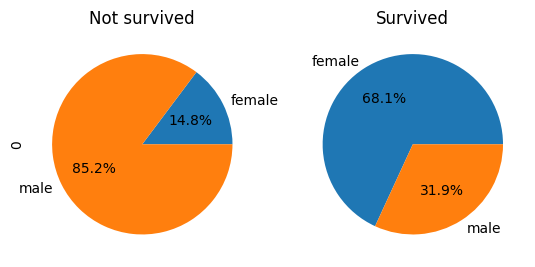

In [17]:
# 성별에 따른 생존자와 사망자 비율 파이 차트
survived_by_sex = titanic_df.groupby(['Sex', 'Survived']).size().unstack()
ax = survived_by_sex.plot(kind='pie', subplots=True, autopct='%1.1f%%', legend=False)
ax[0].set_title('Not survived', loc='center')
ax[1].set_title('Survived', loc='center')
plt.ylabel('')
plt.show()

1-C 사회적 계층(객실, 요금 등)이 높을수록 사망자가 감소하는 경향이 있다.

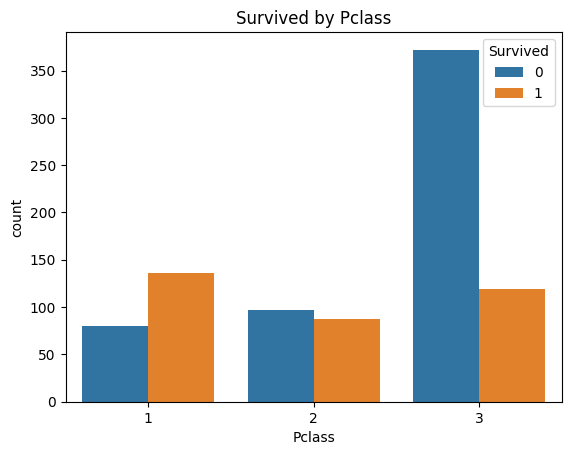

In [18]:
# 객실 등급에 따른 사망자수의 차이 시각화
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survived by Pclass')
plt.show()

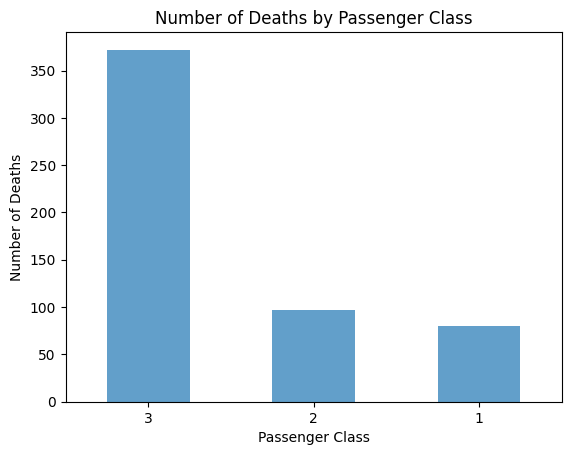

In [19]:
# 객실 등급별 사망자 수 계산
death_by_pclass = titanic_df[titanic_df['Survived'] == 0]['Pclass'].value_counts()

# 막대 그래프로 시각화
death_by_pclass.plot(kind='bar', alpha=0.7)
plt.title('Number of Deaths by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=0)
plt.show()

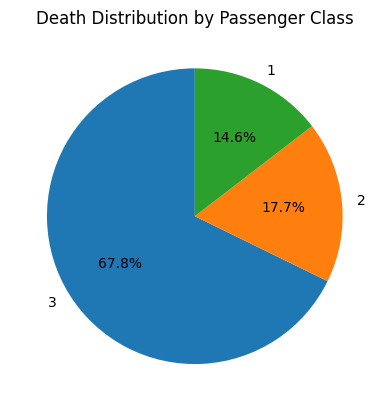

In [21]:
# 파이 차트로 시각화
death_by_pclass.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Death Distribution by Passenger Class')
plt.ylabel('')
plt.show()

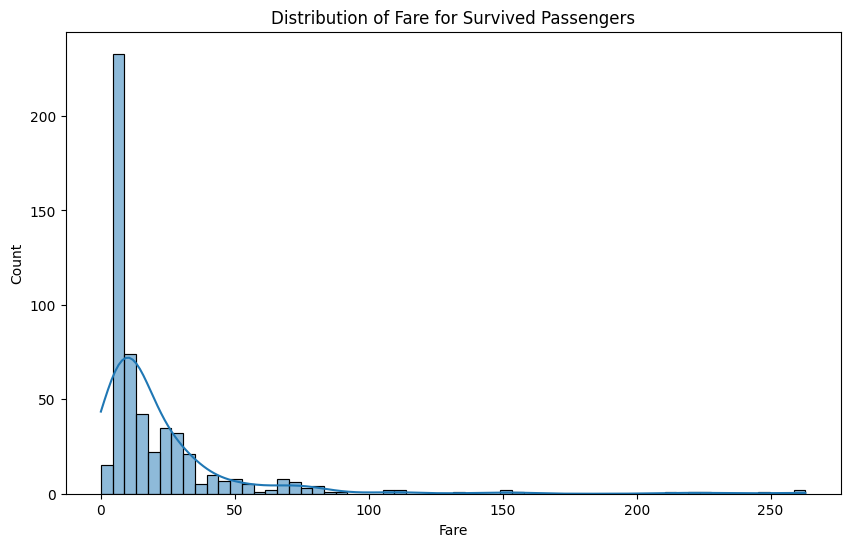

In [22]:
# 사망자의 요금 분포를 시각화
plt.figure(figsize=(10, 6))
sns.histplot(x='Fare', data=titanic_df[titanic_df['Survived'] == 0], kde=True)
plt.title('Distribution of Fare for Survived Passengers')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

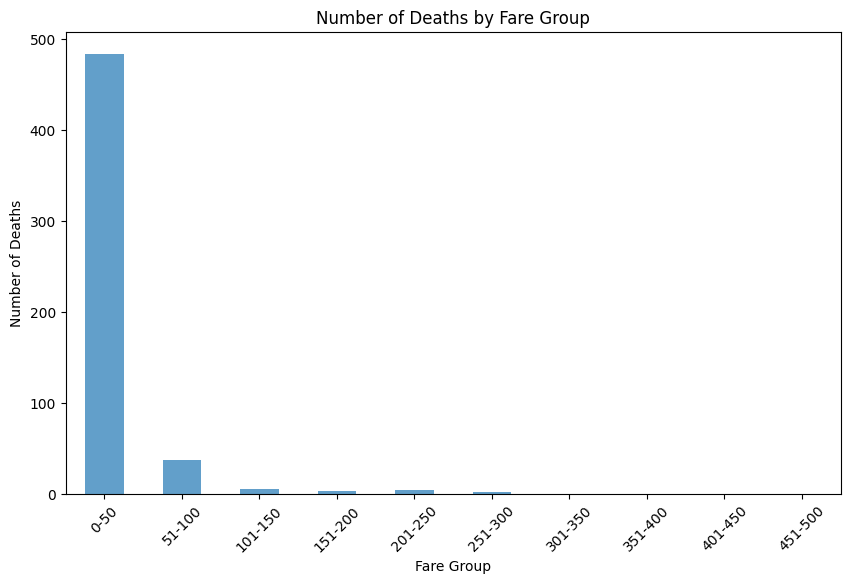

In [23]:
# 요금을 구간별로 나누기
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']
titanic_df['Fare_Group'] = pd.cut(titanic_df['Fare'], bins=bins, labels=labels)

# 각 구간별 사망자 수 계산
death_by_fare_group = titanic_df[titanic_df['Survived'] == 0]['Fare_Group'].value_counts().sort_index()

# 막대 그래프
plt.figure(figsize=(10, 6))
death_by_fare_group.plot(kind='bar', alpha=0.7)
plt.title('Number of Deaths by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

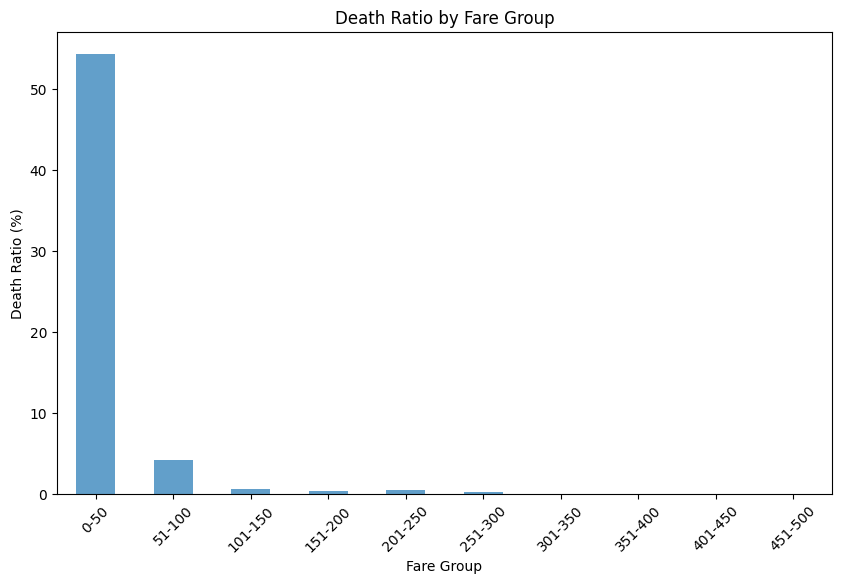

In [24]:
# 전체 승객 수 계산
total_passengers = titanic_df.shape[0]

# 요금 구간별 사망자 수 계산
death_by_fare_group = titanic_df[titanic_df['Survived'] == 0]['Fare_Group'].value_counts().sort_index()

# 각 구간별 사망자 비율 계산
death_ratio_by_fare_group = (death_by_fare_group / total_passengers) * 100

# 막대 그래프
plt.figure(figsize=(10, 6))
death_ratio_by_fare_group.plot(kind='bar', alpha=0.7)
plt.title('Death Ratio by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Death Ratio (%)')
plt.xticks(rotation=45)
plt.show()

1-D 연령이 낮은 경우 사망자가 적으며, 성인의 경우 큰 차이는 없다.

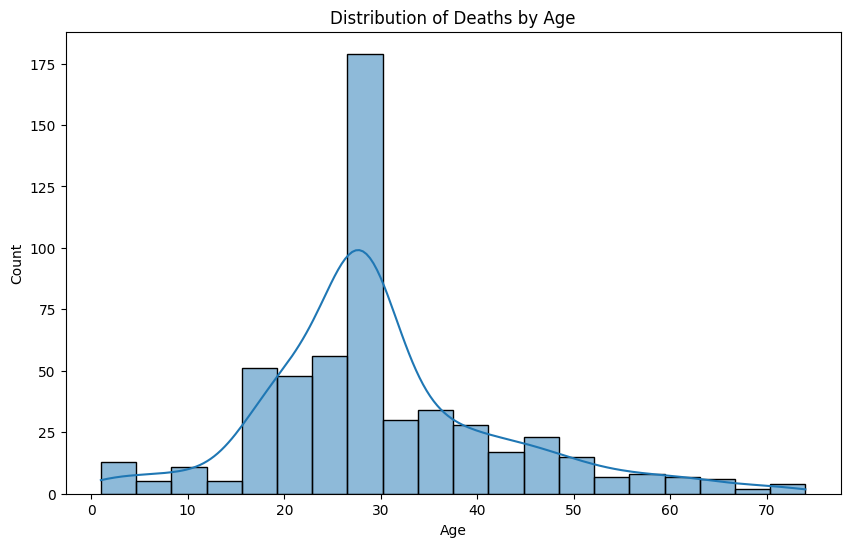

In [25]:
# 연령별 사망자들의 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=titanic_df[titanic_df['Survived'] == 0], bins=20, kde=True)
plt.title('Distribution of Deaths by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

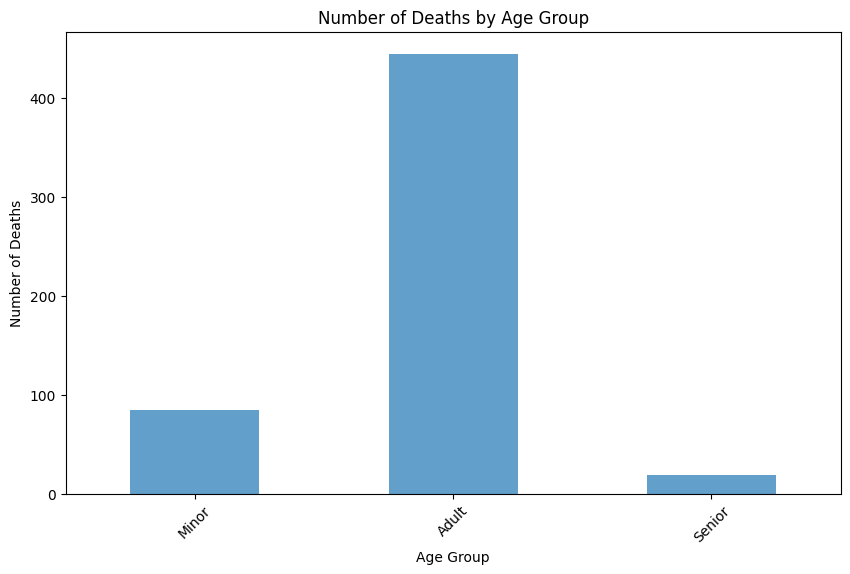

In [28]:
# 나이 범주화
bins = [1, 20, 60, 100]
labels = ['Minor', 'Adult', 'Senior']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels, right=False)

# 각 나이 그룹별 사망자 수 계산
death_by_age_group = titanic_df[titanic_df['Survived'] == 0]['AgeGroup'].value_counts().sort_index()

# 막대 그래프
plt.figure(figsize=(10, 6))
death_by_age_group.plot(kind='bar', alpha=0.7)
plt.title('Number of Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

C:\Users\windows\AppData\Local\Temp\ipykernel_23048\1261250158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead_passengers['Age_Group'] = pd.cut(dead_passengers['Age'], bins=bins, labels=labels)


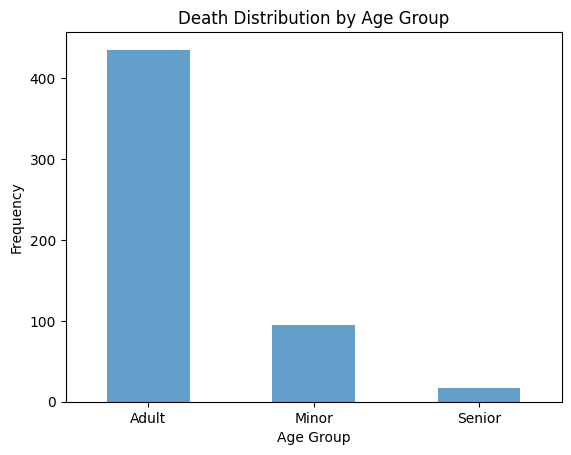

In [31]:
# 사망자만 필터링
dead_passengers = titanic_df[titanic_df['Survived'] == 0]

# 연령을 구간에 따라 범주화
dead_passengers['Age_Group'] = pd.cut(dead_passengers['Age'], bins=bins, labels=labels)

# 각 연령대별 사망자 수 계산
dead_by_age_group = dead_passengers['Age_Group'].value_counts()

# 시각화
dead_by_age_group.plot(kind='bar', alpha=0.7)
plt.title('Death Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

2. Target Label인 'Survived'를 제외한 총 11개의 Feature중
   어떤 feature를 고려하면 강력한 Insight를 얻을 수 있을지 EDA 과정 상세하게 출력 (주석 기입)

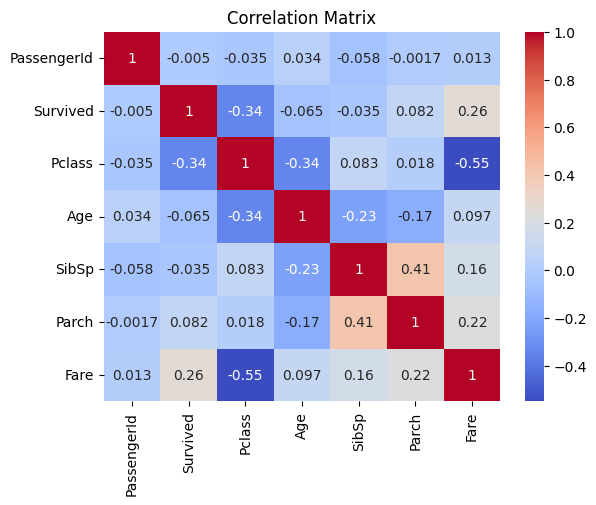

In [32]:
# 숫자형 데이터만을 사용하여 상관관계 히트맵 생성
numeric_df = titanic_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1. 형제 자매의 수와 생존/사망 여부 간의 관계 탐색
##### feature 중 SibSp를 고려하면 Insight를 얻을 수 있음
##### 형제 자매의 수가 증가할수록 생존율이 감소하는 경향을 확인할 수 있음. 즉, 처음 몇 명의 형제 자매를 가진 승객들은 비교적 높은 생존율을 보이지만, 형제 자매의 수가 증가할수록 생존율이 감소함

In [34]:
# 형제 자매의 수에 따른 생존자와 사망자 수 계산
sibsp_survived = titanic_df.groupby('SibSp')['Survived'].sum()
sibsp_dead = titanic_df.groupby('SibSp')['Survived'].count() - sibsp_survived

# 생존율과 사망율 계산
survival_rate = sibsp_survived / (sibsp_survived + sibsp_dead)
death_rate = 1 - survival_rate

# 결과 출력
sibsp_df = pd.DataFrame({'Survived': sibsp_survived, 'Dead': sibsp_dead, 'Survival Rate': survival_rate, 'Death Rate': death_rate})
print(sibsp_df)

       Survived  Dead  Survival Rate  Death Rate
SibSp                                           
0           210   398       0.345395    0.654605
1           112    97       0.535885    0.464115
2            13    15       0.464286    0.535714
3             4    12       0.250000    0.750000
4             3    15       0.166667    0.833333
5             0     5       0.000000    1.000000
8             0     7       0.000000    1.000000


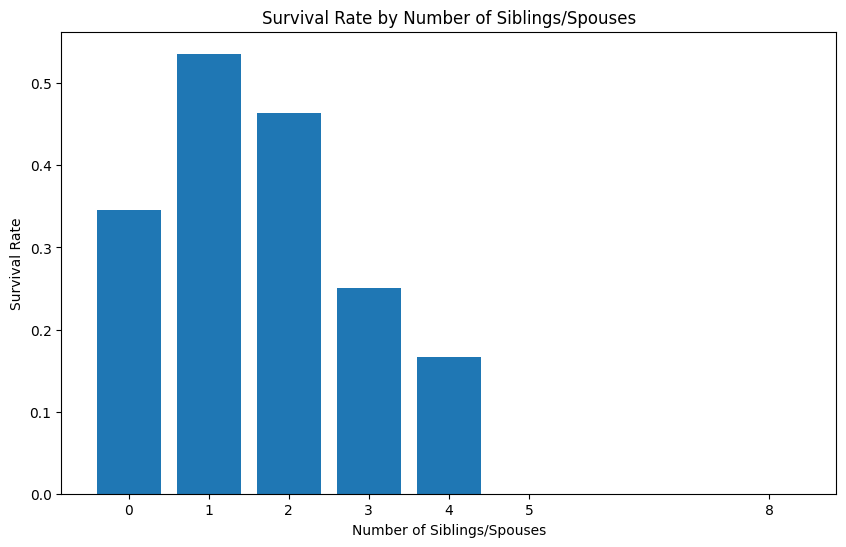

In [39]:
# 생존율 시각화
plt.figure(figsize=(10, 6))
plt.bar(sibsp_df.index, sibsp_df['Survival Rate'])
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.xticks(sibsp_df.index)
plt.show()

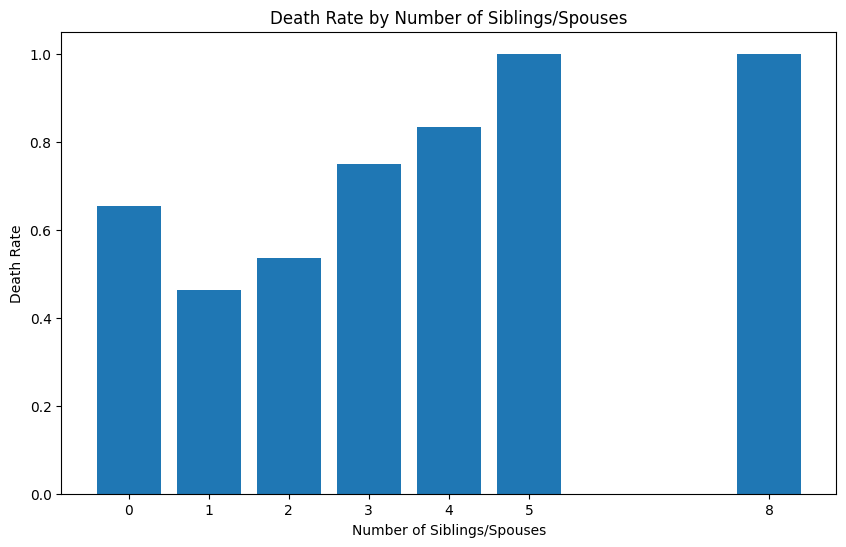

In [37]:
# 사망율 시각화
plt.figure(figsize=(10, 6))
plt.bar(sibsp_df.index, sibsp_df['Death Rate'])
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Death Rate')
plt.title('Death Rate by Number of Siblings/Spouses')
plt.xticks(sibsp_df.index)
plt.show()


2. 가족 구성원의 수에 따른 생존/사망 여부 탐색
##### feature 중 SibSp와 Parch를 함께 고려하여 insight 도출
##### (1) 부모/자녀의 수가 0인 경우(혼자 탑승한 경우)와 1 또는 2인 경우(적은 수의 가족과 함께 탑승한 경우)의 생존율이 비교적 높음
##### (2) 하지만 부모/자녀의 수가 3 이상인 경우(많은 수의 가족과 함께 탑승한 경우)의 생존율은 크게 감소
##### (3) 이로부터 혼자 탑승한 승객이나 적은 수의 가족과 함께 탑승한 승객들이 생존율이 더 높았지만, 가족 수가 많아질수록 생존율이 낮아진다는 것을 알 수 있음

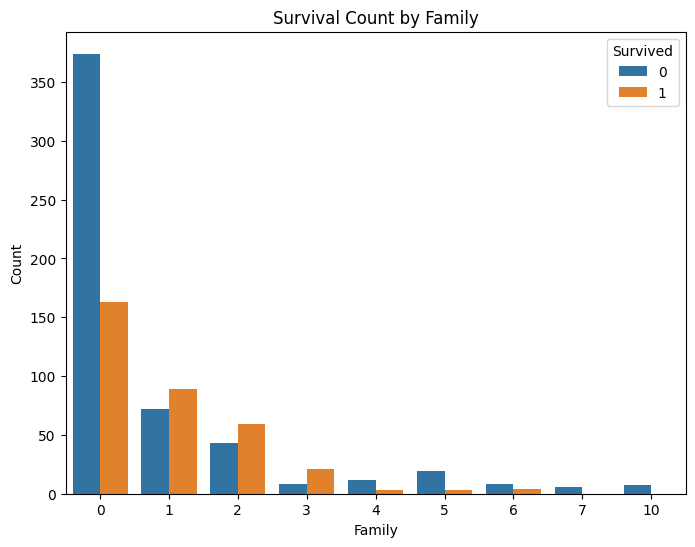

In [43]:
# 가족 유무 (Family)
# 형제/자매(SibSp)와 부모/자녀(Parch) 수를 합쳐서 가족 유무를 나타내는 feature 생성
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']
plt.figure(figsize=(8, 6))
sns.countplot(x='Family', hue='Survived', data=titanic_df)
plt.title('Survival Count by Family')
plt.xlabel('Family')
plt.ylabel('Count')
plt.show()

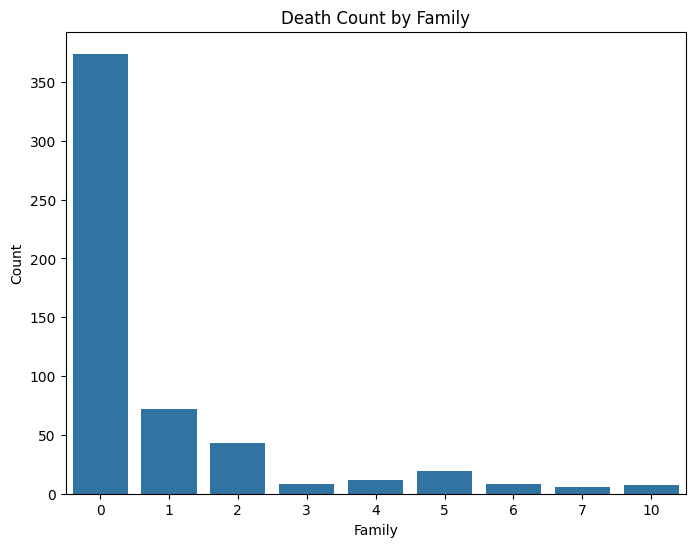

In [44]:
# 가족 구성원의 수에 따른 사망자 수 시각화
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']
plt.figure(figsize=(8, 6))
sns.countplot(x='Family', data=titanic_df[titanic_df['Survived'] == 0])
plt.title('Death Count by Family')
plt.xlabel('Family')
plt.ylabel('Count')
plt.show()

형제/자매가 많을 수록 대체적으로 생존율이 감소함을 알 수 있음

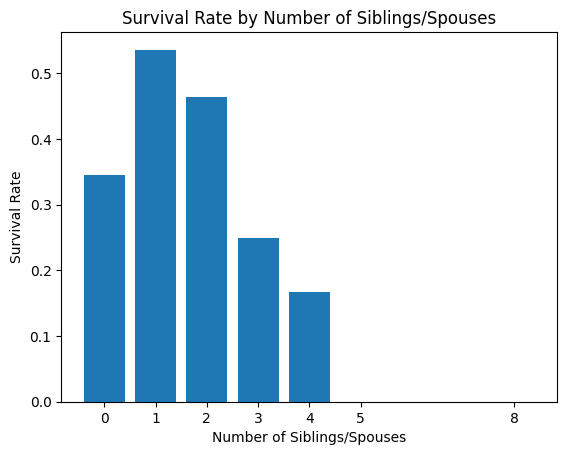

In [45]:
# 형제 자매의 수에 따른 사망자 수 계산
survival_by_sibsp = df.groupby('SibSp')['Survived'].mean()

# 시각화
plt.bar(survival_by_sibsp.index, survival_by_sibsp.values)
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.xticks(survival_by_sibsp.index)
plt.show()

3. 이름의 호칭에 따른 생존/사망 여부 탐색

##### feature 중 Name에서 호칭(prefix)를 추출하여 강력한 insight를 도출
##### 이름에서 호칭을 추출함으로써 각 승객이 남성인지, 여성인지를 알 수 있음
##### 이를 통해 성별에 따라 생존율이 크게 달라지는 것을 확인할 수 있음
##### 일반적으로 여성의 생존율이 높은 반면, 남성의 생존율은 낮은 경향이 보임

##### 또한, 호칭을 통해 어른인지, 아이인지 등을 구분할 수 있음. 일부 호칭은 어린이나 노인을 나타냄. 이를 통해 생존율에 미치는 연령 요소를 파악할 수 있음 예를 들어, "Master"라는 호칭은 어린 남자를 나타내는 경우가 많으며, 이들이 성인에 비해 우선적으로 구조되는 경향이 있음을 보임.

##### 따라서 호칭을 추출하여 성별과 연령에 따른 생존율의 차이를 분석함으로써, 타이타닉 호침에서 생존에 영향을 미치는 다양한 요인들을 더 잘 이해할 수 있음

##### Mr: Mr 호칭은 남성을 나타내는 호칭으로 생존율이 매우 낮은 것을 알 수 있음. 이는 주로 남성이 구조 작업에 참여하고 여성과 어린이를 구조하는 과정에서 생존율이 낮았을 가능성이 있는 것으로 보임
##### Miss: Miss 호칭은 미혼 여성을 나타내며 생존율이 상당히 높은 것을 알 수 있음. 여성을 구조에 우선순위를 두었을 가능성이 있음
##### Mrs: Mrs 호칭은 기혼 여성을 나타내며 생존율이 중간 정도임. 기혼 여성 중 일부는 미혼 여성들에 비해 생존율이 낮은데, 이는 자신의 가족과 함께 탈출하기 위해 희생을 했을 가능성으로 보임
##### Master: Master 호칭은 어린 남자 아이를 나타내며 생존율이 높은 편임. 아마도 어린 아이들이 구조의 우선순위 대상이었을 것임.

In [59]:
# 이름에서 호칭(prefix) 추출
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')

# 호칭별 사망율 계산
death_by_title = df.groupby('Title')['Survived'].mean().sort_values()


print("Death Rate by Title:")
print(death_by_title)

Death Rate by Title:
Title
Capt        0.000000
Don         0.000000
Jonkheer    0.000000
Rev         0.000000
Mr          0.156673
Dr          0.428571
Col         0.500000
Major       0.500000
Master      0.575000
Miss        0.697802
Mrs         0.792000
Mlle        1.000000
Mme         1.000000
Countess    1.000000
Ms          1.000000
Lady        1.000000
Sir         1.000000
Name: Survived, dtype: float64


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\windows\AppData\Local\Temp\ipykernel_23048\3309184158.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')


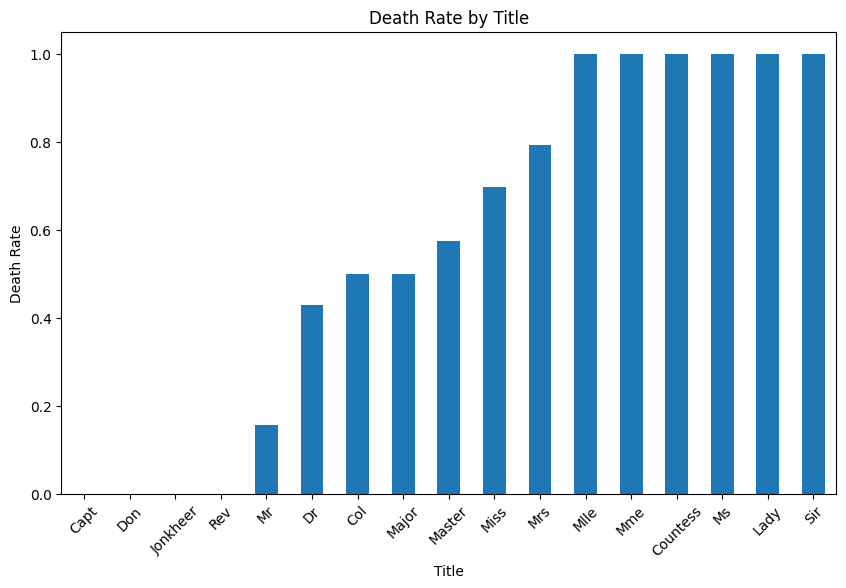

In [61]:
# 호칭에 따른 사망율 시각화
plt.figure(figsize=(10, 6))
death_by_title.plot(kind='bar')
plt.title('Death Rate by Title')
plt.xlabel('Title')
plt.ylabel('Death Rate')
plt.xticks(rotation=45)
plt.show()

3. 차별화된 나의 방법 및 결론

- 본인이 생각했을 때 친구들과 비교하여 (타 사이트 등), 내가 특별히 사용한 방법, 나만이 도출했다 생각한 가설, 나만이 구현한 시각화 결과 등 자유롭게 기술

나만의 차별화된 방법은 주로 데이터 시각화와 통계적 분석을 결합한 접근이라고 생각한다. 다수의 친구들이나 다른 사이트에서는 주로 단일 변수의 영향을 중심으로 생존율을 분석하는 경향이 있었다. 하지만 나는 다양한 요인들 간의 복합적 상호작용을 고려하여 분석을 진행했다. 예를 들어, 가족 구성원의 수와 성별, 그리고 연령을 함께 고려하여 생존율을 분석했다. 이러한 다중 변수 분석을 통해 더 풍부하고 심층적인 결론을 도출할 수 있었다. 또한, 호칭을 활용한 세분화된 성별 및 연령 분석은 다른 사람과 구별되게 도출한 시각화 결과라고 생각한다. 이를 통해 생존율에 영향을 미치는 다양한 요인들을 보다 전체적으로 이해할 수 있었다.

4. 끝 부분: 본 과제를 통해 느낀점 기술

이번 과제를 수행하면서 데이터 분석의 복잡성과 그 중요성을 다시 한 번 깨달았다. 다양한 변수를 고려하여 정확한 결론을 도출하기 위해서는 철저한 데이터 전처리와 심층적인 분석이 필요하다는 것을 느꼈다. 특히, 데이터의 세분화된 측면을 고려하는 것이 생각보다 복잡하고 시간이 많이 소요되었다. 이를 향후 과제나 프로젝트에서 개선하기 위해서는 데이터 전처리 단계부터 정확히 수행하고, 분석 방법 또한 보다 엄밀하게 정확한 결과가 나온 것이 맞는지 확인하는 절차가 필요하다고 느꼈다.

또한, 다른 사람들과의 비교를 통해 나만의 독창성을 부각시키는 것이 어렵다고 느꼈다. column이 15개 내로 존재하는 상황에서 어떻게 남들과 다르게 나만의 방식으로 EDA를 해야할지 고민하는데 많은 시간이 걸렸다. 앞으로는 데이터 분석 과제에 대해 보다 창의적이고 독창적인 방법을 모색하여 접근할 수 있도록 노력해야겠다는 생각이 들었다.